In [2]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
from __future__ import division
sns.set_style('whitegrid')

In [3]:
donor = pd.read_csv('Election_Donor_Data.csv')

C:\Users\zzhan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [5]:
donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [6]:
donor['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 236.07          1
 153.60          1
 116.35          1
 233.33          1
 86.21           1
 600.74          1
 130.20          1
 50.04           1
 78.55           1
 266.10          1
 77.83           1
 222.75          1
 217.75          1
 261.50          1
 240.25          1
-45.50           1
 161.50          1
 268.76          1
 100.56          1
 6.26            1
 114.43          1
 823.88     

In [7]:
don_mean = donor['contb_receipt_amt'].mean()
don_std = donor['contb_receipt_amt'].std()

In [8]:
# the std is way too large comparing to average
print 'The average donation was %.2f with a std %.2f' %(don_mean,don_std)

The average donation was 298.24 with a std 3749.67


In [9]:
top_donor = donor['contb_receipt_amt'].copy()
top_donor.sort()
top_donor

C:\Users\zzhan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [11]:
# remove refund records
top_donor = top_donor[top_donor > 0]
top_donor.tail(10)

823345      25000.00
217891      25800.00
114754      33300.00
257270     451726.00
335187     512710.91
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, dtype: float64

In [12]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

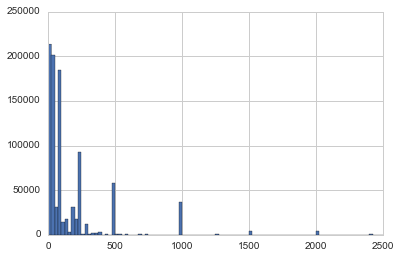

In [17]:
com_don = top_donor [top_donor < 2500]
com_don.hist(bins=100)

In [19]:
candidate = donor.cand_nm.unique()
candidate

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [27]:
# creat new column :'Party'
def party (cand_nm):
    if cand_nm =='Obama, Barack':
        return 'Democrat'
    else: 
        return 'Republican'

In [28]:
donor['Party'] = donor['cand_nm'].map(party)

In [29]:
donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [30]:
donor.Party.value_counts()

Democrat      593746
Republican    407985
Name: Party, dtype: int64

In [32]:
#remove refund
donor = donor [donor.contb_receipt_amt > 0]

In [33]:
# count of donors
donor.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [35]:
# donoation amount
can_amount = donor.groupby('cand_nm')['contb_receipt_amt'].sum()
can_amount

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

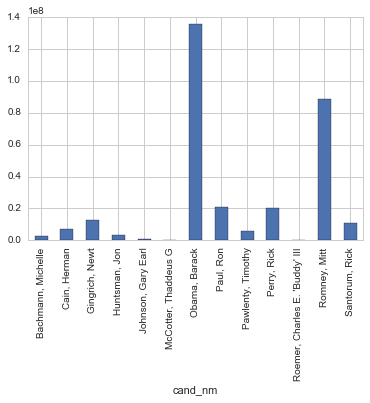

In [41]:
can_amount.plot(kind = 'bar')

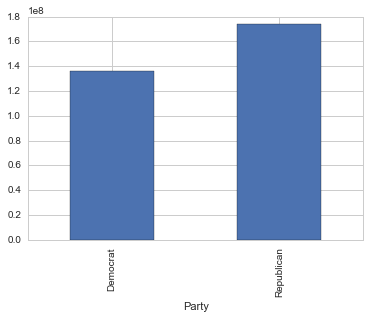

In [42]:
donor.groupby('Party')['contb_receipt_amt'].sum().plot(kind = 'bar')

In [45]:
# donation by occupation
occupation = donor.pivot_table('contb_receipt_amt',
                               index = 'contbr_occupation',
                              columns ='Party',
                              aggfunc = 'sum')

In [46]:
occupation.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [47]:
occupation.shape

(45067, 2)

In [48]:
# focus on large donation amount 
# sum(1) means sum by axis = 1
occupation = occupation[occupation.sum(1)> 1000000]

In [49]:
occupation.shape

(31, 2)

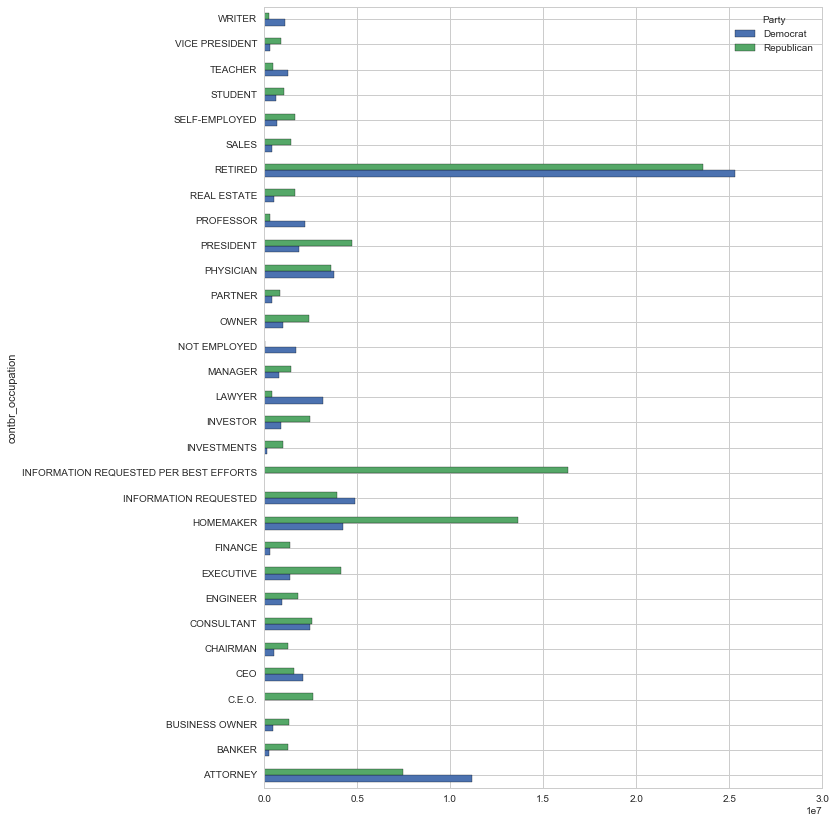

In [61]:
occupation.plot(kind = 'barh',figsize = (10,14))

In [65]:
# drop n.a.
occupation.drop(['INFORMATION REQUESTED PER BEST EFFORTS',
                 'INFORMATION REQUESTED'],axis = 0, inplace = True)

In [66]:
occupation.shape

(29, 2)

In [67]:
# combine CEO with C.E.O
occupation.loc['CEO'] = occupation.loc['CEO']+occupation.loc['C.E.O.']
occupation.drop('C.E.O.',inplace = True)

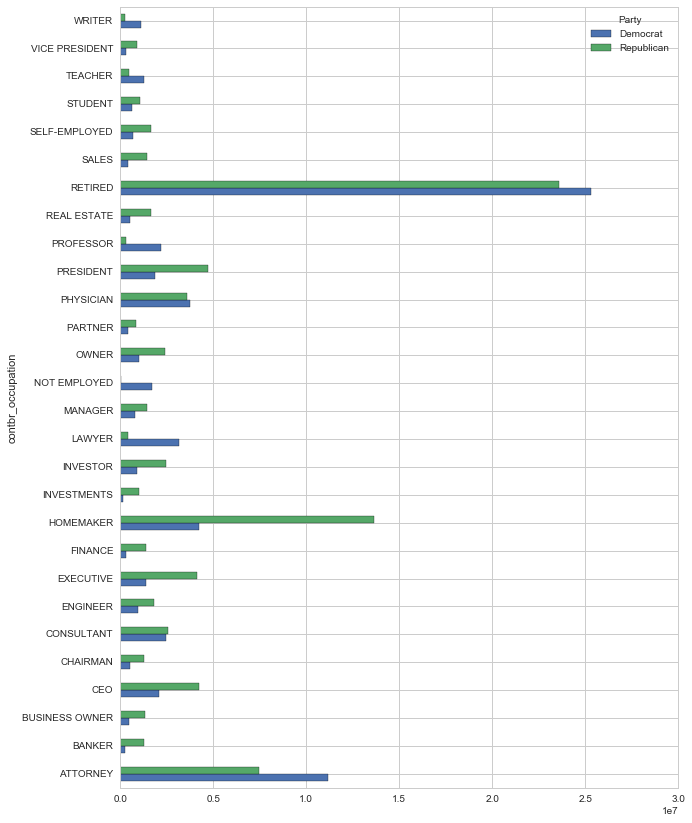

In [68]:
occupation.plot(kind = 'barh',figsize = (10,14))

In [70]:
# donation by state
state = donor.groupby('contbr_st')['contb_receipt_amt'].sum()

In [85]:
state.shape

(7L,)

In [72]:
state = state[state > 10000000]

In [74]:
state

contbr_st
CA    4.459223e+07
FL    2.179367e+07
IL    2.266924e+07
MA    1.236522e+07
NY    2.822914e+07
TX    3.237864e+07
VA    1.002449e+07
Name: contb_receipt_amt, dtype: float64

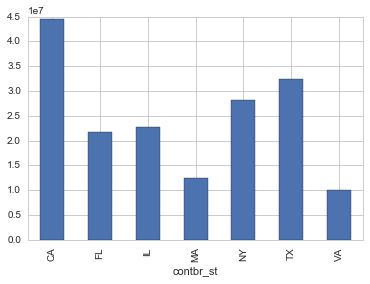

In [79]:
state.plot(kind = 'bar')